<table>
    <td>
        <img src="https://ciadaconcepcao.com.br/wp-content/uploads/2017/01/innohub-270x270.png" style="width: 100px">
    </td>
    <td>
        <img src="https://i.ibb.co/vJ858Kg/ets-logo2.png" style="width: 200px">
    </td>
</table>


# <center>Treinamento Iot - CV-LA Engineering - Módulo II</center>
## <center>Aula 6 - Seaborn</center>



<img src="https://seaborn.pydata.org/_static/logo-wide-lightbg.svg">

Seaborn é uma biblioteca para geração de gráficos estatísticos em Python. Tem como base o Matplotlib e possui forte integração com as estruturas de dados do pandas.<br>
O grande objetivo do seaborn é facilitar a visualização e entendimento de dados.
Serão abordados: 
* Visualizando relações estatísticas.
* Plotando com categorias de dados.
* Visualizando a distribuição de um conjunto de dados.
* Visualizando relações lineares.
* Construindo redes multi-plot estruturadas.

O modo mais comum de chamar a biblioteca é usando o alias **sns**.

In [1]:
import seaborn as sns

Análise estatística é um processo onde procuramos entender como variáveis em um conjunto de dados se relacionam e como esses relacionamentos dependem de outras variáveis.

Na biblioteca Seaborn utiliza-se a função **relplot()** para explorar estes relacionamentos.
Dois tipos de gráficos são usados: dispersão de pontos (scatterplot) e de linhas (lineplot).

Para a aula de hoje estaremos usando o dataset **tips.csv**. Ele consiste em dados de um restaurante, contendo o valor de uma compra (*total_bill*), o valor da gorjeta (*tip*), informações sobre o cliente (*sex, smoker*), o dia e horário da compra (*day, time*) e a quantidade de pratos pedidos (*servings*).

In [2]:
import pandas as pd

tips = pd.read_csv('data/tips.csv',sep=';')
tips.head()

,total_bill,tip,sex,smoker,day,time,servings
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.shape

(244, 7)

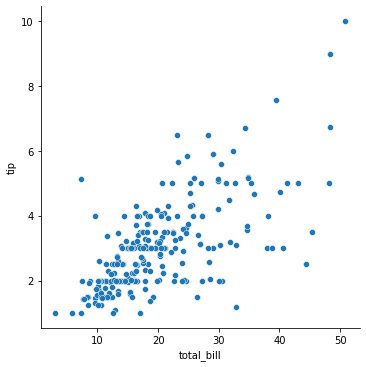

In [6]:
sns.relplot(x='total_bill', y='tip', data = tips)

Os pontos são plotados em duas dimensões (x, y), mas podemos adicionar outra dimensão ao mudar a cor dos pontos de acordo com uma terceira variável.

Para isso utilizamos o parâmetro hue. Nela passamos o nome da variável que queremos mudar. hue=“nome_da_variável”.

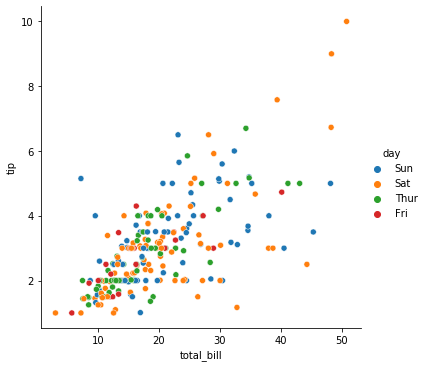

In [26]:
sns.relplot(x='total_bill', y='tip', hue = 'day', data = tips)

É possível também alterar o estilo e o tamanho dos pontos.  

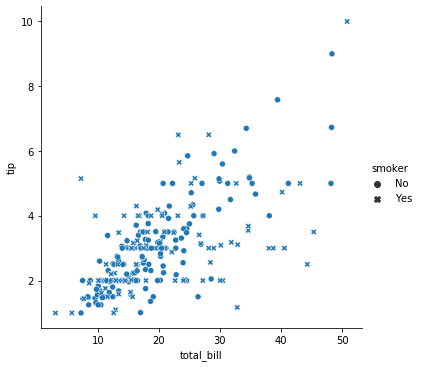

In [27]:
sns.relplot(x='total_bill', y='tip', style= 'smoker', data = tips)

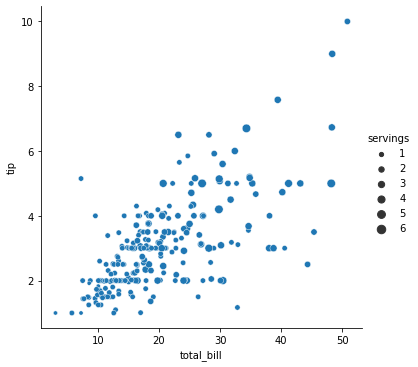

In [28]:
sns.relplot(x='total_bill', y='tip', size = 'servings', data = tips)

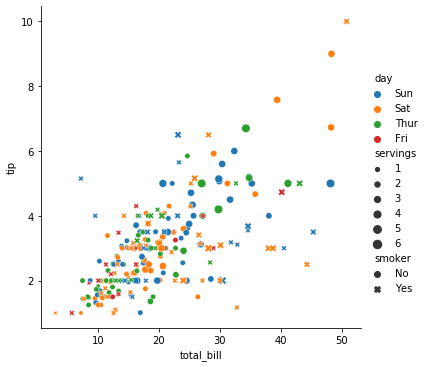

In [29]:
sns.relplot(x='total_bill', y='tip', style = 'smoker', hue = 'day', size = 'servings', data = tips)

Podemos separar em colunas e linhas, de acordo com um variável:

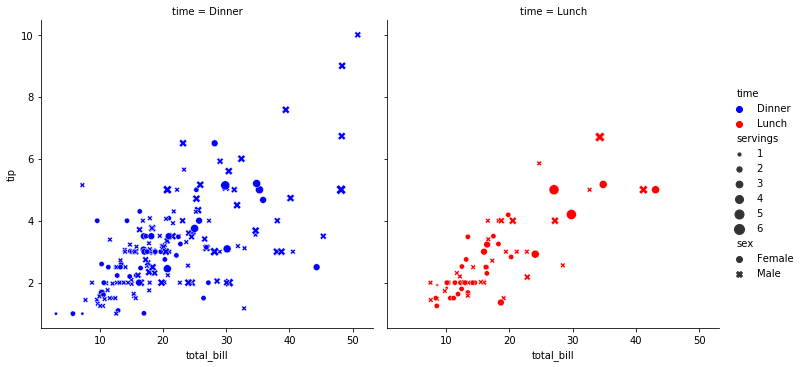

In [12]:
sns.relplot(x="total_bill", y="tip", col="time", 
    hue="time", size="servings", style="sex",
    palette=["b", "r"], sizes=(10, 100),data=tips)

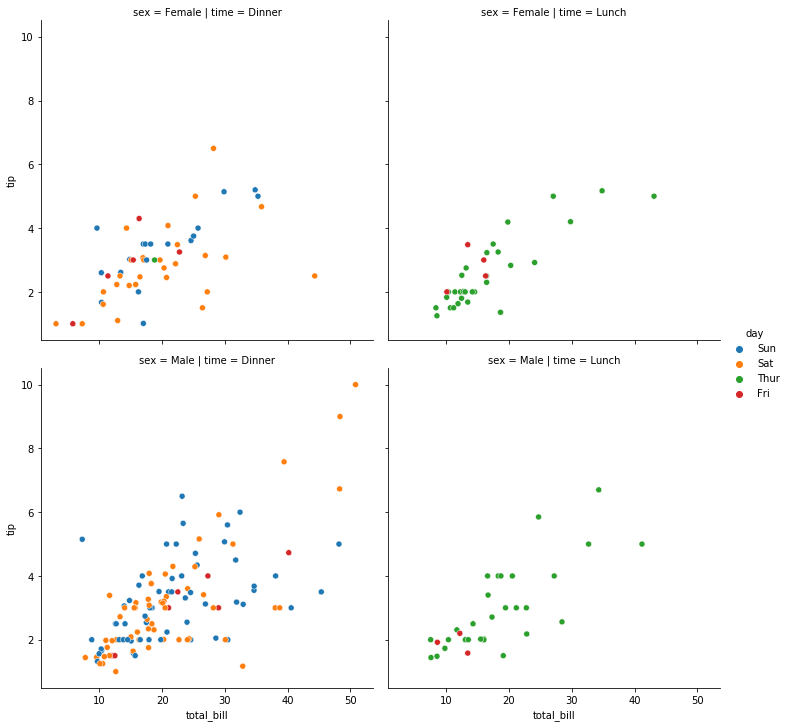

In [10]:
sns.relplot(x='total_bill', y='tip', hue = 'day', col = 'time', row = 'sex', data = tips)

Em alguns conjuntos de dados é interessante entender as mudanças de uma variável ao longo do tempo, ou alguma outra variável continua. Em situações assim, uma boa escolha é enfatizar a continuidade usando gráficos de linhas.

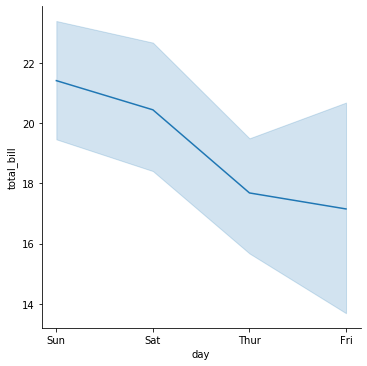

In [9]:
k = ['Thur','Fri','Sat','Sun']

dayWeek = sorted(tips.day, key=k.index) # para o gráfico ficar na ordem certa
                                        # caso contrário, a ordem é a em que os itens aparecem no dataset
sns.relplot(x='day',y='total_bill',data=tips,kind='line')

Podemos adicionar outras variáveis, assim como no gráfico de dispersão.

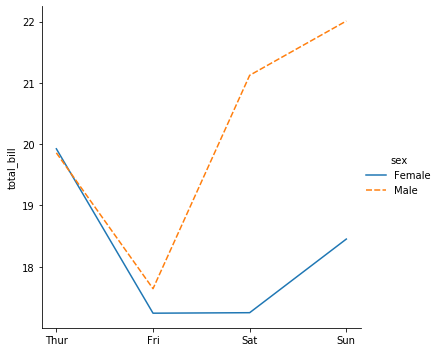

In [17]:
sns.relplot(x=dayWeek,y='total_bill',data=tips,kind='line',hue='sex',style='sex',ci=None)

## Plotando dados categóricos

Em estatística, uma variável categórica é uma variável que pode assumir apenas um número limitado, e geralmente fixo, de valores possíveis, atribuindo cada indivíduo ou outra unidade de observação a um determinado grupo ou categoria nominal com base em alguma propriedade qualitativa.

Existem diversos tipos de gráficos possíveis, cada um se encaixa melhor para certas aplicações. No seaborn utilizaremos a função **catplot**, o tipo de gráfico é setado pelo argumento "kind". O padrão (se nada for passado ao kind) é o strip plot. Mudando o argumento **kind** mudamos o tipo de gráfico categórico.

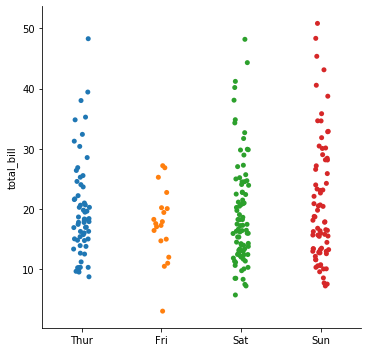

In [19]:
sns.catplot(x=dayWeek, y='total_bill', data=tips)

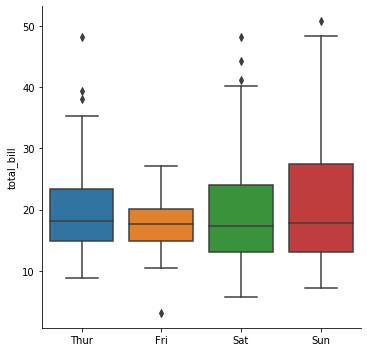

In [21]:
sns.catplot(x=dayWeek, y='total_bill', data=tips, kind='box')

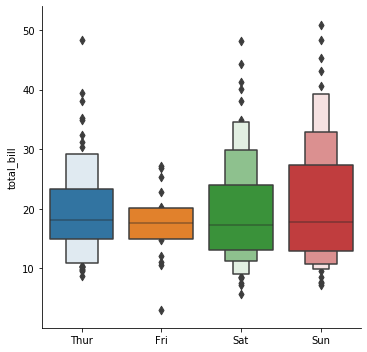

In [22]:
sns.catplot(x=dayWeek, y='total_bill', data=tips, kind='boxen')

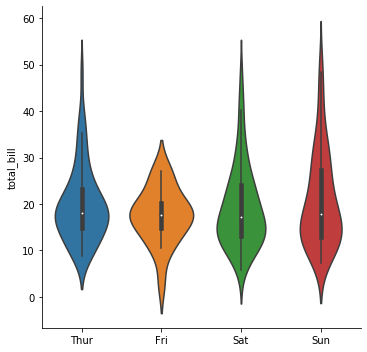

In [23]:
sns.catplot(x=dayWeek, y='total_bill', data=tips, kind='violin')

Ao lidar com dados, é interessante ter uma ideia de como as variáveis estão distribuídas. A forma mais fácil de se fazer isso, é utilizando a função distplot(). Serão plotados um histograma e uma curva chamada Kernel Density Estimation, KDE.

C:\Users\ojv9ct\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


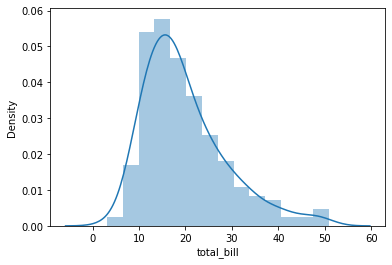

In [44]:
sns.distplot(tips['total_bill'])

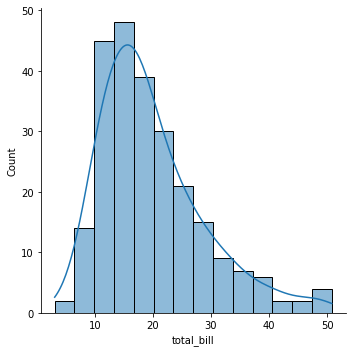

In [48]:
sns.displot(tips['total_bill'], kde=True)

Para visualizar a distribuição de duas variáveis, a função jointplot() cria um painel para mostrar o relacionamento conjunto.

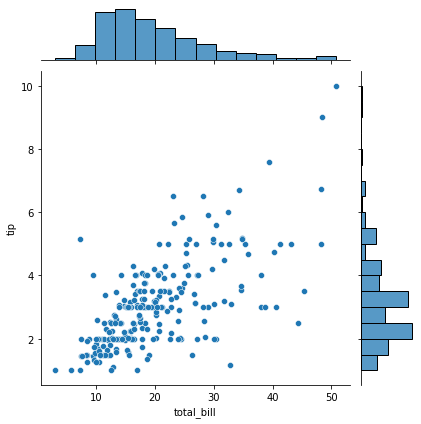

In [49]:
sns.jointplot(x='total_bill',y='tip',data=tips)

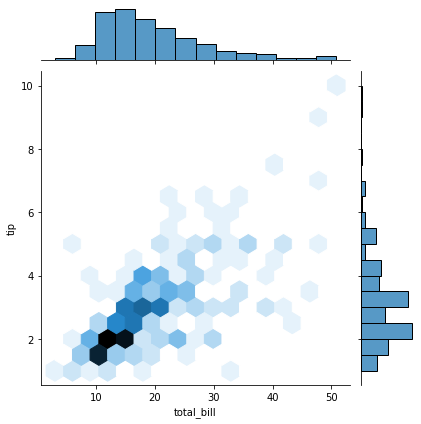

In [50]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex')

O count é parecido com o histograma, mas com variáveis categóricas, ele mostra a frequência de cada valor categórico dentro do dataset, podendo mostrar relações com outras variáveis.

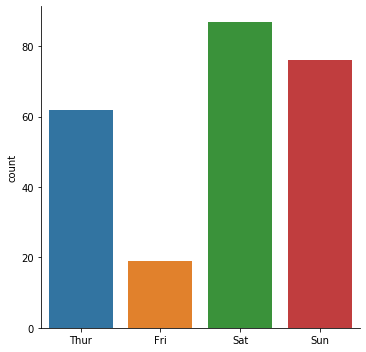

In [30]:
sns.catplot(x=dayWeek,data=tips, kind='count')

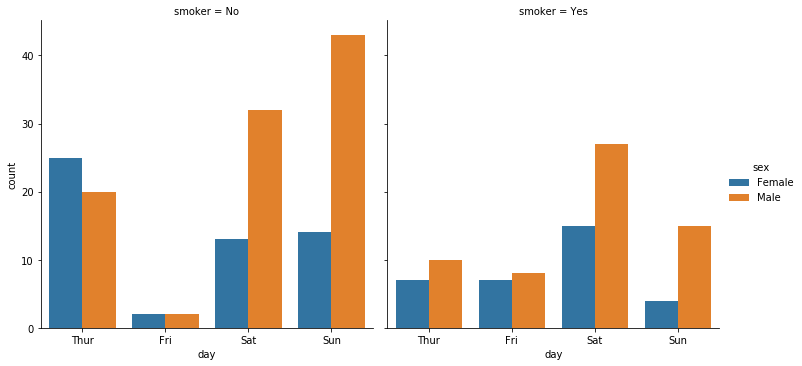

In [6]:
sns.catplot(x='day', hue='sex', data=tips, col='smoker', kind='count', order=k)

Para visualizar a correlação entre todas as variáveis do dataset, podemos utilizar a função pairplot do seaborn, ela mostrará a correlação entre variáveis em gráficos de dispersão, além dos histogramas mostrando as distribuições de cada variável. 


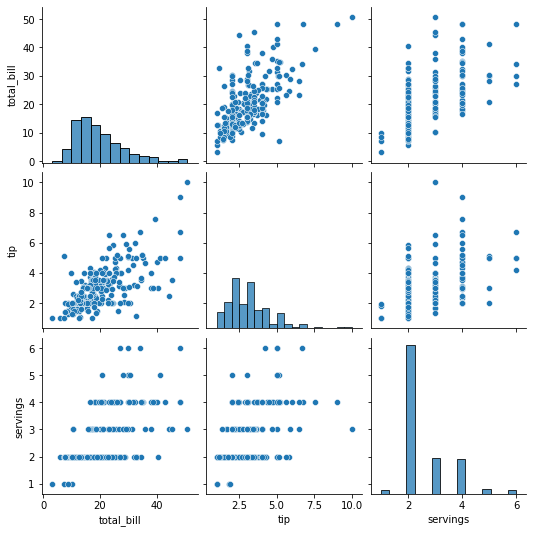

In [51]:
sns.pairplot(tips)

## Regressão linear

A análise de regressão estuda a relação entre uma variável chamada dependente e outras variáveis chamadas independentes. <br>
A relação pode ser representada por um modelo matemático que associa as variáveis entre si. Caso o modelo defina uma relação linear entre a variável dependente e uma variável independente, este é então chamado de modelo de regressão linear simples.

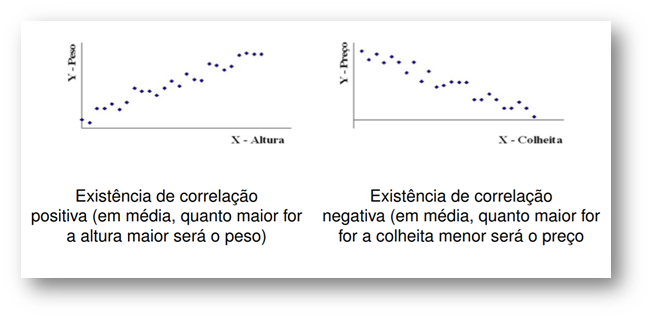

Muitos conjuntos de dados contém múltiplas variáveis quantitativas e frequentemente o objetivo de uma análise é relacionar as variáveis umas com as outras. Assim, podemos realizar uma regressão linear para melhor visualização. As funções regplot() e lmplot() realizam esta tarefa.

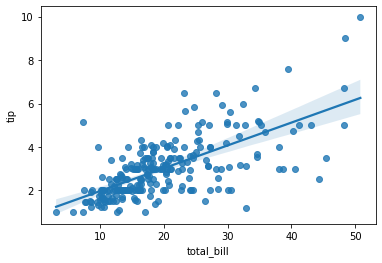

In [52]:
sns.regplot(x='total_bill',y='tip',data=tips)

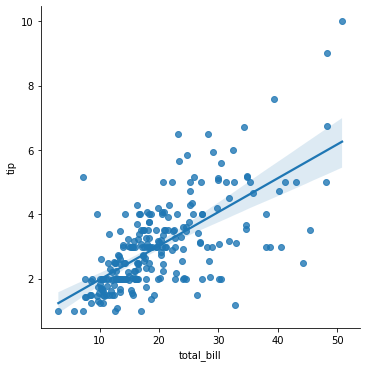

In [53]:
sns.lmplot(x='total_bill',y='tip',data=tips)

## Desafio

Crie Series através de uma lista, um array numpy e um dicionário.


![alt text](https://databootcamp.nyc3.digitaloceanspaces.com/img/desafio.jpg)

# Chega de seaborn por hoje
# :D